Logistic Regression Accuracy per fold: [1.         0.96666667 0.93333333 1.         0.93333333]
Logistic Regression Average Accuracy: 96.67%

Support Vector Machine (SVM) Accuracy per fold: [1.         1.         0.93333333 1.         1.        ]
Support Vector Machine (SVM) Average Accuracy: 98.67%

Decision Tree Accuracy per fold: [1.         0.96666667 0.93333333 0.96666667 0.9       ]
Decision Tree Average Accuracy: 95.33%

Random Forest Accuracy per fold: [1.         0.96666667 0.93333333 0.96666667 0.9       ]
Random Forest Average Accuracy: 95.33%

K-Nearest Neighbors Accuracy per fold: [1.         0.96666667 0.93333333 1.         0.93333333]
K-Nearest Neighbors Average Accuracy: 96.67%

Naive Bayes Accuracy per fold: [0.96666667 0.96666667 0.9        1.         0.9       ]
Naive Bayes Average Accuracy: 94.67%



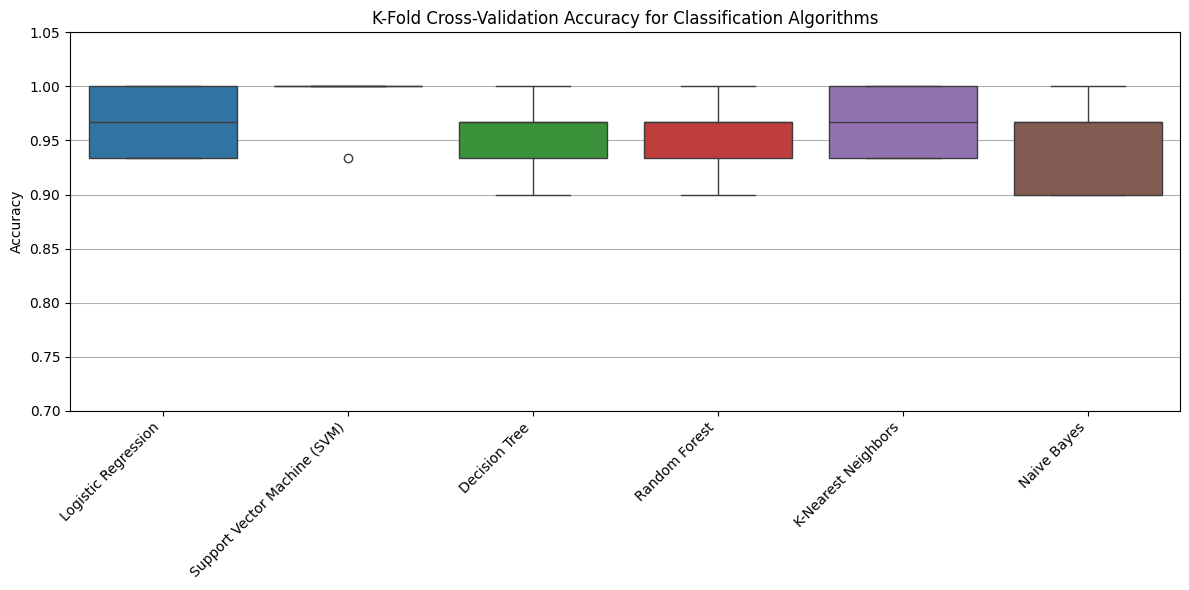

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import pandas as pd

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Convert to DataFrame for easier plotting
df = pd.DataFrame(X, columns=feature_names)
df['species'] = pd.Categorical.from_codes(y, target_names)

# Define stratified k-fold cross-validator
k = 5
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Support Vector Machine (SVM)": SVC(kernel='linear'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Apply k-fold cross-validation and store scores
results = {}
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X, y, cv=kf)
    results[name] = scores
    print(f"{name} Accuracy per fold: {scores}")
    print(f"{name} Average Accuracy: {np.mean(scores)*100:.2f}%\n")

# Plot K-Fold accuracy boxplots for classifiers
plt.figure(figsize=(12, 6))
score_data = [results[name] for name in classifiers.keys()]
sns.boxplot(data=score_data)
plt.xticks(ticks=range(len(classifiers)), labels=list(classifiers.keys()), rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('K-Fold Cross-Validation Accuracy for Classification Algorithms')
plt.ylim(0.7, 1.05)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
